In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Embedding, concatenate, Flatten, Input,\
                         Dropout, BatchNormalization

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
def MAPE(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [5]:
ratings = pd.read_csv('Hotel_Ratings.csv')
ratings.head()

,userid,Hotelid,OverallRating
0,user_78131,hotel_558,3
1,user_78131,hotel_603,2
2,user_78131,hotel_610,3
3,user_78131,hotel_574,3
4,user_78131,hotel_570,3


In [6]:
ratings.userid.nunique()

5010

In [7]:
ratings.Hotelid.nunique()

130

In [8]:
ratings.OverallRating.nunique()

5

In [9]:
from sklearn.preprocessing import LabelEncoder
enc_u = LabelEncoder()
enc_h = LabelEncoder()

user = enc_u.fit_transform(ratings.userid.values.reshape(-1,1))
Hotel = enc_h.fit_transform(ratings.Hotelid.values.reshape(-1,1))

C:\Users\BabjiManohar\Miniconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
# cat_tar_attr = pd.get_dummies(ratings.OverallRating).values
# cat_tar_attr.shape

In [12]:
User_train, User_test, Hotel_train, Hotel_test, Y_train, Y_test = \
train_test_split(user,  Hotel, ratings.OverallRating, test_size=0.2, random_state=123)

In [71]:
user_input = Input(shape=(1, ), name="User_Layer")
user_embed = Embedding(input_dim = ratings.userid.nunique(), output_dim = 80, name="User_Embedding_Layer")(user_input)
user_embed = Dropout(0.9)(user_embed)

hotel_input = Input(shape=(1, ), name="Hotel_Layer")
hotel_embed = Embedding(input_dim= ratings.Hotelid.nunique(), output_dim = 30, name="Hotel_Embedding_Layer")(hotel_input)
hotel_embed = Dropout(0.9)(hotel_embed)

merge_cat_emb = concatenate([user_embed, hotel_embed])

merge_cat_emb_flat = Flatten()(merge_cat_emb)

merged_layer_2 = Dense(10, activation= 'relu', name="Dense_Merged_Layer_2")(merge_cat_emb_flat)
merged_layer_2 = Dropout(0.7)(merged_layer_2)
output_layer = Dense(5, activation='softmax', name="Output_Layer" )(merged_layer_2)
output_layer = Dropout(0.9)(output_layer)
output_layer_final = Dense(1, activation='linear', name="Output_Layer_Final" )(output_layer)

model = Model(inputs=[user_input, hotel_input], outputs=output_layer_final)

In [72]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
User_Layer (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
Hotel_Layer (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
User_Embedding_Layer (Embedding (None, 1, 80)        400800      User_Layer[0][0]                 
__________________________________________________________________________________________________
Hotel_Embedding_Layer (Embeddin (None, 1, 30)        3900        Hotel_Layer[0][0]                
__________________________________________________________________________________________________
concatenat

In [73]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

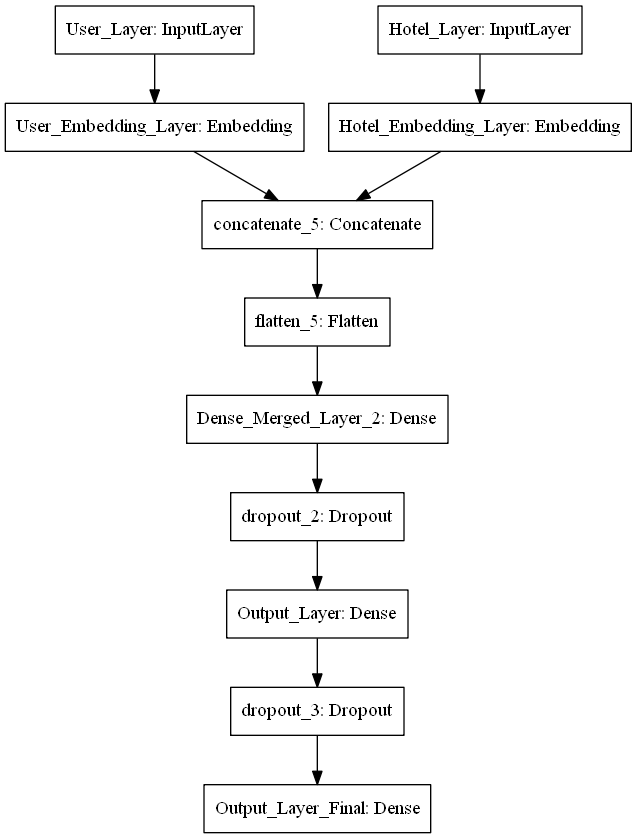

In [74]:
from IPython.display import Image
Image("model.png")

In [75]:
model.compile(loss='mean_squared_error', optimizer='adagrad', metrics=['mae'])

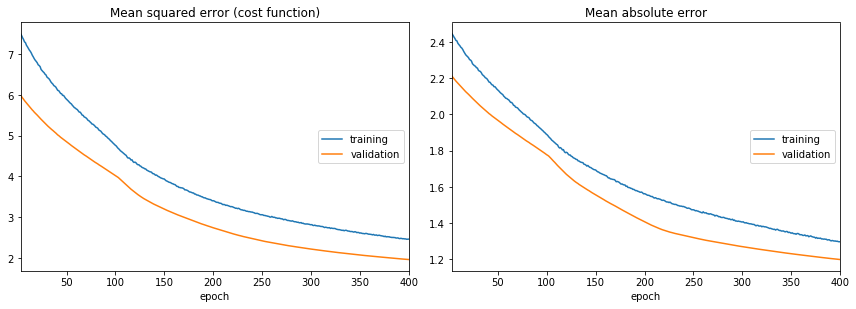

Mean squared error (cost function):
training   (min:    2.459, max:    7.624, cur:    2.462)
validation (min:    1.963, max:    6.061, cur:    1.963)

Mean absolute error:
training   (min:    1.296, max:    2.470, cur:    1.296)
validation (min:    1.198, max:    2.226, cur:    1.198)


In [77]:
from livelossplot.keras import PlotLossesCallback

model.fit([User_train, Hotel_train], y = Y_train, epochs=400, validation_split=0.3,
          batch_size= 5000, 
          shuffle=True,
          callbacks=[PlotLossesCallback()],
          verbose=2)

In [ ]:
y_pred = model.predict([User_test, Hotel_test])

MAPE(Y_test[:20000], y_pred[:20000])

In [47]:
14,15

41.4513293261196

In [44]:
12,13

38.59028507914968

In [40]:
10,11

37.187180270205204

In [39]:
8,9

37.187180270205204

In [37]:
7

34.98331176703337

In [35]:
6

34.91695699034648

In [33]:
5

35.56059423176657

In [31]:
4

36.422500289738835

In [29]:
3

37.64042448306849

In [26]:
2

39.40382028667753

In [23]:
1

45.308221590997206

In [65]:
model.evaluate([User_test, Hotel_test], Y_test)

54387/54387 [==============================] - 3s 54us/step


[0.7639867179758101, 0.7639867179758101]

In [35]:
# model.get_weights()

In [24]:
model.get_weights()[0].shape ## Weights of the user embeddings no bias

(5010, 20)

In [25]:
model.get_weights()[1].shape ## Weights of the movie embeddings no bias

(130, 20)

In [30]:
model.get_weights()[2].shape ## Weights of the Dense_Merged_Layer layer

(40, 10)

In [31]:
model.get_weights()[3].shape ## Bias of the Dense_Merged_Layer layer

(10,)

In [32]:
model.get_weights()[4].shape ## Weights of the output layer

(10, 1)

In [33]:
model.get_weights()[5].shape ## Bias of the output layer

(1,)